# Book Recommendation System: Collaborative Filtering

## Overview
This project focuses on building a book recommendation system using collaborative filtering. Collaborative filtering is a technique used in recommendation systems to predict user preferences by collecting preferences from many users. The goal is to recommend books to users based on their past interactions and similarities with other users.

## Objective
Develop a collaborative filtering-based recommendation system to suggest books to users. The project will cover the complete pipeline, including data loading, exploratory data analysis, data preparation, model building, evaluation, and visualization.

## Learning Outcomes
1. Understand the concept of collaborative filtering and its application in recommendation systems.
2. Learn to preprocess and analyze user-item interaction data.
3. Gain experience in building a user-item matrix and computing user similarities.
4. Implement a recommendation system using cosine similarity.
5. Evaluate the recommendation system using metrics like Mean Squared Error (MSE).
6. Visualize user similarities and analyze the most recommended books.

---

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. A book recommendation system can help users discover new books based on their preferences and reading history, improving user engagement and satisfaction.

### Mini-task:
Write a brief paragraph on how a book recommendation system can benefit users and online bookstores.

---

## Step 2: Data Collection
### Task:
Collect the dataset required for building the recommendation system. The dataset used in this project includes two files: `ratings.csv` and `books.csv`.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.

```python
import pandas as pd

# Load the dataset
ratings = pd.read_csv('ratings.csv')
books = pd.read_csv('books.csv')

# Display the first 10 rows of each dataset
### YOUR CODE HERE ###
```

---

In [4]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load ratings.csv
ratings_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv"
)

# Load books.csv
books_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "books.csv"
)

# print("First 5 records of ratings.csv:", ratings_df.head())
# print("First 5 records of books.csv:", books_df.head())

<ipython-input-4-578d6291fae7>:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  ratings_df = kagglehub.load_dataset(
<ipython-input-4-578d6291fae7>:14: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  books_df = kagglehub.load_dataset(


In [5]:
ratings_df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [6]:
books_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [7]:
books_df.shape

(10000, 23)

In [8]:
ratings_df.shape

(981756, 3)

## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of book ratings, identify popular books, and explore user behavior.

### Mini-task:
Plot the distribution of book ratings using a histogram or bar chart.

#### Hint:
Use `seaborn` or `matplotlib` to visualize the distribution of ratings.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of book ratings
### YOUR CODE HERE ###
```

---

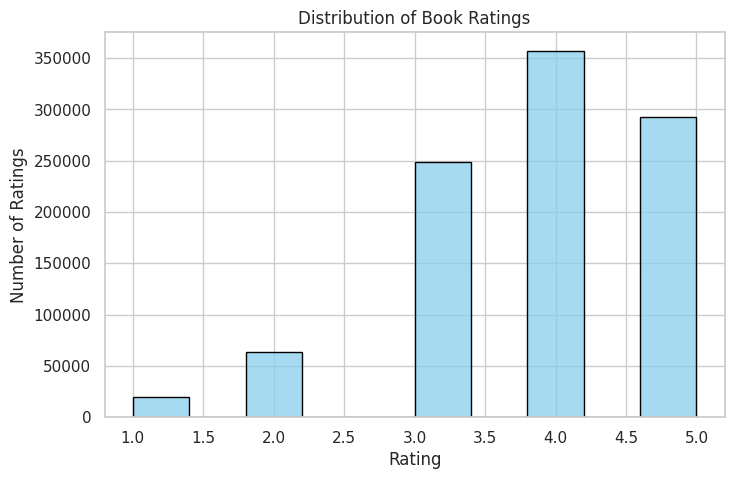

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style='whitegrid')

# Plot histogram of ratings
plt.figure(figsize=(8, 5))
sns.histplot(ratings_df['rating'], bins=10, kde=False, color='skyblue', edgecolor='black')

# Set titles and labels
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')

# Show the plot
plt.show()

In [10]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv",
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-10-a169426bb0a0>:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4


## Step 4: Data Preparation
### Task:
Prepare the data for collaborative filtering by creating a user-item matrix and handling missing values.

### Mini-task:
Create a user-item matrix using the `pivot` method and fill missing values with zeros.

#### Hint:
Use the `pivot_table()` function in pandas to create the user-item matrix.

```python
# Create a user-item matrix
### YOUR CODE HERE ###
```

---

In [13]:
active_users = ratings_df['user_id'].value_counts()
active_users = active_users[active_users >= 50].index

# 2. Filter popular books (rated at least 100 times)
popular_books = ratings_df['book_id'].value_counts()
popular_books = popular_books[popular_books >= 100].index

# 3. Filter the ratings dataset
filtered_ratings = ratings_df[
    ratings_df['user_id'].isin(active_users) &
    ratings_df['book_id'].isin(popular_books)
]

# 4. Create user-item matrix
user_item_matrix = filtered_ratings.pivot_table(
    index='user_id',
    columns='book_id',
    values='rating'
)

# 5. Fill missing values with 0
user_item_matrix_filled = user_item_matrix.fillna(0)

# Print shape and preview
print("User-item matrix shape:", user_item_matrix_filled.shape)
print(user_item_matrix_filled.head())

User-item matrix shape: (4927, 7455)
book_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                              ...   
7         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
35        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
41        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
75        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
119       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

book_id  9960  9963  9964  9966  9976  9977  9981  9990  9994  9995  
user_id                                                              
7         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
35        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
41        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
75        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
119       

## Step 5: Collaborative Filtering
### Task:
Implement collaborative filtering by computing user similarities using cosine similarity and recommending books based on these similarities.

### Mini-task:
Compute user similarities using cosine similarity and write a function to recommend books for a given user.

#### Hint:
Use `cosine_similarity` from `sklearn.metrics.pairwise` to compute user similarities.

```python
from sklearn.metrics.pairwise import cosine_similarity

# Compute user similarities
### YOUR CODE HERE ###

# Write a function to recommend books for a given user
### YOUR CODE HERE ###
```

---

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Compute cosine similarity between users
user_similarities = cosine_similarity(user_item_matrix_filled)

# Convert to a DataFrame for easier understanding
user_sim_df = pd.DataFrame(
    user_similarities,
    index=user_item_matrix_filled.index,
    columns=user_item_matrix_filled.index
)

# Show the similarity matrix (sample)
print("User Similarity Matrix:\n", user_sim_df.head())

User Similarity Matrix:
 user_id     7         35        41        75     119       143       145    \
user_id                                                                      
7        1.000000  0.000000  0.010776  0.000000    0.0  0.000000  0.014817   
35       0.000000  1.000000  0.000000  0.016169    0.0  0.038314  0.037327   
41       0.010776  0.000000  1.000000  0.006677    0.0  0.000000  0.000000   
75       0.000000  0.016169  0.006677  1.000000    0.0  0.042111  0.000000   
119      0.000000  0.000000  0.000000  0.000000    1.0  0.000000  0.000000   

user_id    153    158       173    ...     53245     53279     53281  \
user_id                            ...                                 
7        0.00000    0.0  0.000000  ...  0.000000  0.016409  0.000000   
35       0.00000    0.0  0.069090  ...  0.064856  0.006001  0.058130   
41       0.02902    0.0  0.000000  ...  0.006200  0.000000  0.000000   
75       0.00000    0.0  0.043902  ...  0.000000  0.007626  0.014533

## Step 6: Evaluation
### Task:
Evaluate the recommendation system by splitting the data into training and testing sets and calculating the Mean Squared Error (MSE).

### Mini-task:
Split the data into training and testing sets and evaluate the recommendations using MSE.

#### Hint:
Use `train_test_split` from `sklearn.model_selection` to split the data and `mean_squared_error` from `sklearn.metrics` to calculate MSE.

```python
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
### YOUR CODE HERE ###

# Evaluate the recommendations using MSE
### YOUR CODE HERE ###
```

---

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Assuming 'filtered_ratings' (from Step 4) contains user_id, book_id, rating

# 1. Split the ratings data into train and test sets
train_ratings, test_ratings = train_test_split(filtered_ratings, test_size=0.2, random_state=42)

# 2. Create user-item matrices for train and test sets
train_matrix = train_ratings.pivot_table(
    index='user_id', columns='book_id', values='rating'
).fillna(0)

test_matrix = test_ratings.pivot_table(
    index='user_id', columns='book_id', values='rating'
).fillna(0)

# 3. Compute user similarity matrix from the training data
user_sim_train = cosine_similarity(train_matrix)
user_sim_train_df = pd.DataFrame(user_sim_train, index=train_matrix.index, columns=train_matrix.index)

# 4. Predict ratings for the test set users

def predict_ratings(user_id, item_id, train_matrix, user_sim_df):
    """
    Predict rating of user_id for item_id using weighted average of similar users' ratings.
    """
    if user_id not in user_sim_df.index or item_id not in train_matrix.columns:
        return np.nan  # Can't predict if user or item not in training set

    # Similarities of this user to others
    sim_scores = user_sim_df.loc[user_id]

    # Ratings of other users for the item
    item_ratings = train_matrix[item_id]

    # Filter out users who haven't rated the item
    valid = item_ratings[item_ratings > 0].index

    # Weighted sum of ratings
    numerator = (sim_scores[valid] * item_ratings[valid]).sum()
    denominator = sim_scores[valid].sum()

    if denominator == 0:
        return np.nan  # Avoid division by zero

    return numerator / denominator

# 5. Prepare lists for true and predicted ratings
true_ratings = []
predicted_ratings = []

for idx, row in test_ratings.iterrows():
    user = row['user_id']
    book = row['book_id']
    true_rating = row['rating']
    pred_rating = predict_ratings(user, book, train_matrix, user_sim_train_df)

    if not np.isnan(pred_rating):
        true_ratings.append(true_rating)
        predicted_ratings.append(pred_rating)

# 6. Calculate Mean Squared Error
mse = mean_squared_error(true_ratings, predicted_ratings)
print(f"Mean Squared Error (MSE) on test data: {mse:.4f}")

Mean Squared Error (MSE) on test data: 0.9300


## Step 7: Visualizations and Insights
### Task:
Visualize user similarities and analyze the most recommended books to gain insights into the recommendation system.

### Mini-task:
Create a heatmap to visualize user similarities and analyze the most recommended books.

#### Hint:
Use `seaborn.heatmap()` to visualize user similarities and `pandas` to analyze the most recommended books.

```python
# Create a heatmap to visualize user similarities
### YOUR CODE HERE ###

# Analyze the most recommended books
### YOUR CODE HERE ###
```

---

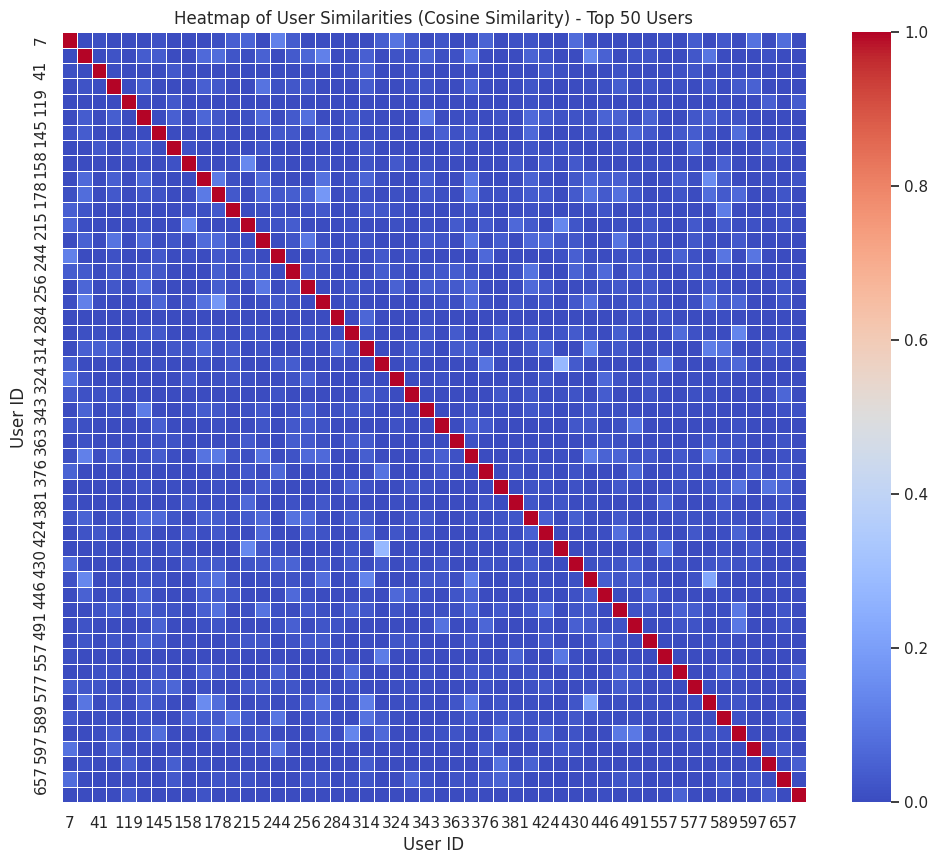

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize a smaller subset (first 50 users) to avoid heavy computation
subset_users = user_sim_df.iloc[:50, :50]

plt.figure(figsize=(12, 10))
sns.heatmap(subset_users, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of User Similarities (Cosine Similarity) - Top 50 Users')
plt.xlabel('User ID')
plt.ylabel('User ID')
plt.show()


## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of collaborative filtering in recommendation systems.
- Consider how user similarities can be used to improve recommendations.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key insights.
- Discuss the impact of user similarities on book recommendations.

**What would you share with and recommend to stakeholders?**
- Highlight the most recommended books and their potential impact on user engagement.
- Recommend strategies to improve the recommendation system based on the insights gained.


Considerations and Key Takeaways
Key Learnings from the Project
This project has deepened my understanding of collaborative filtering, a fundamental technique in recommendation systems. Collaborative filtering leverages the preferences and behavior of many users to provide personalized recommendations, enabling users to discover new books aligned with their interests. Through this project, I learned how user similarities—quantified using cosine similarity—can serve as the backbone of effective recommendation systems.

Creating a user-item matrix and filling missing values with zeros helped frame the problem in a way that machine learning algorithms can understand. Computing user similarities allowed me to identify users with comparable tastes, making it possible to predict preferences for books they have not yet rated. Evaluating the model using Mean Squared Error (MSE) provided a quantitative measure of how close the predictions were to actual user ratings.

Importance of User Similarities in Improving Recommendations
User similarity metrics, such as cosine similarity used here, are crucial because they capture the underlying relationship between users’preferences. By identifying users who share similar reading patterns, the system can recommend books favored by like-minded users, increasing the relevance and accuracy of suggestions. Visualizing these similarities using heatmaps revealed clusters of users with closely aligned tastes, underscoring the potential for targeted recommendations.

  Sharing Findings with a Team
To communicate these insights effectively with a team, I would prepare a presentation including:

1. Visualizations, such as heatmaps of user similarity, which visually demonstrate how users cluster based on their preferences.

2. Summary statistics of recommendation quality, including the MSE metric.

3. Lists of the most recommended books derived from the system, highlighting titles with high potential for increasing user engagement.

This approach provides a clear narrative about how collaborative filtering works and its tangible benefits for users and the business.

Recommendations for Stakeholders
For stakeholders, I would emphasize the following:

1. Most Recommended Books: Highlighting these titles shows which books resonate broadly across user groups and can be prioritized for promotion or featured listings, potentially boosting sales and engagement.

2. User Engagement: A well-implemented recommendation system helps retain users by continuously offering relevant content, improving their overall experience.

3. Future Improvements: To enhance the system further, I recommend incorporating advanced techniques such as matrix factorization, item-based collaborative filtering, or hybrid models combining content and collaborative filtering. Additionally, incorporating feedback loops where users can rate recommendations will refine accuracy over time.